# Getting the Dataset

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2020-06-03 04:37:16--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 2607:f8b0:400e:c09::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   106MB/s    in 0.6s    

2020-06-03 04:37:17 (106 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



# Creating Directories for Training and Validation

In [0]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


# Building a Sequential Model

In [5]:
model = tf.keras.models.Sequential([
                                    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       7

# Setting an Optimizer and training the model

In [0]:
# Getting Adadelta Optimizer
adam = tf.keras.optimizers.Adadelta(learning_rate=0.00001, rho=0.95)

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['acc'])

In [8]:
#Using ImageDataGenerator to generate training and Validation sets
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=10,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
# Training the Model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=200,  # 2000 images = batch_size * steps
      epochs=50,
      validation_data=validation_generator,
      validation_steps=100,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/50
200/200 - 8s - loss: 0.6928 - acc: 0.5065 - val_loss: 0.6933 - val_acc: 0.5010
Epoch 2/50
200/200 - 8s - loss: 0.6931 - acc: 0.5065 - val_loss: 0.6933 - val_acc: 0.5020
Epoch 3/50
200/200 - 8s - loss: 0.6926 - acc: 0.5110 - val_loss: 0.6933 - val_acc: 0.5000
Epoch 4/50
200/200 - 8s - loss: 0.6929 - acc: 0.5195 - val_loss: 0.6933 - val_acc: 0.5010
Epoch 5/50
200/200 - 8s - loss: 0.6929 - acc: 0.4990 - val_loss: 0.6933 - val_acc: 0.4990
Epoch 6/50
200/200 - 8s - loss: 0.6928 - acc: 0.5205 - val_loss: 0.6933 - val_acc: 0.5000
Epoch 7/50
200/200 - 8s - loss: 0.6929 - acc: 0.5130 - val_loss: 0.6933 - val_acc: 0.5000
Epoch 8/50
200/200 - 8s - loss: 0.6929 - acc: 0.5070 - val_loss: 0.6933 - val_acc: 0.5020
Epoch 9/50
200/200 - 8s - loss: 0.6929 - acc: 0.5190 - val_loss: 0.6933 - val_acc: 0.5070
Epoch 10/50
200/200 - 8s - loss: 0.6930 - acc: 0.5180 - val_loss: 0.6933 - val_acc: 0.5060
Epoch 11/50
200/200 - 8s - loss: 0.6928 - acc: 0.5130 - val_loss: 0.6933 - val_acc: 0.5080
Epoch 12

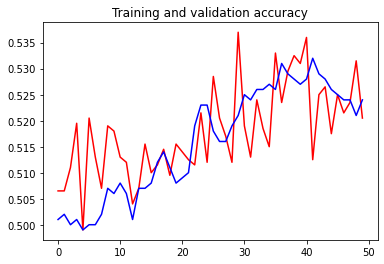

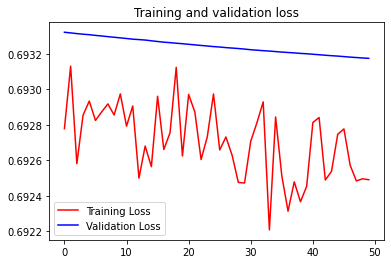

In [12]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Experimenting With AlexNet Architecture

In [15]:
model2 = tf.keras.models.Sequential([
                                    
    tf.keras.layers.Conv2D(96, (11,11),strides = (4,4),activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D((3,3), strides=(2,2)),

    tf.keras.layers.Conv2D(256, (5,5), padding = 'same', activation='relu'),
    tf.keras.layers.MaxPooling2D((3,3), strides=(2,2)),

    tf.keras.layers.Conv2D(384, (3,3),padding = 'same', activation='relu'),
    tf.keras.layers.Conv2D(384, (3,3),padding = 'same', activation='relu'),
    tf.keras.layers.Conv2D(256, (3,3),padding = 'same', activation='relu'),
    tf.keras.layers.MaxPooling2D((3,3), strides=(2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 35, 35, 96)        34944     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 96)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 17, 17, 256)       614656    
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 8, 8, 384)         885120    
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 8, 8, 384)         1327488   
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 8, 8, 256)        

In [0]:
model2.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

In [21]:
# Training the Model
history = model2.fit_generator(
      train_generator,
      steps_per_epoch=200,  # 2000 images = batch_size * steps
      epochs=50,
      validation_data=validation_generator,
      validation_steps=100,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/50
200/200 - 8s - loss: 0.7002 - acc: 0.4950 - val_loss: 0.6908 - val_acc: 0.5000
Epoch 2/50
200/200 - 8s - loss: 0.6938 - acc: 0.5035 - val_loss: 0.6882 - val_acc: 0.5880
Epoch 3/50
200/200 - 8s - loss: 0.6862 - acc: 0.5650 - val_loss: 0.6768 - val_acc: 0.5730
Epoch 4/50
200/200 - 8s - loss: 0.6753 - acc: 0.5995 - val_loss: 0.6442 - val_acc: 0.6300
Epoch 5/50
200/200 - 8s - loss: 0.6196 - acc: 0.6530 - val_loss: 0.6296 - val_acc: 0.6760
Epoch 6/50
200/200 - 8s - loss: 0.5793 - acc: 0.7115 - val_loss: 0.6768 - val_acc: 0.6210
Epoch 7/50
200/200 - 8s - loss: 0.5313 - acc: 0.7465 - val_loss: 0.5828 - val_acc: 0.6960
Epoch 8/50
200/200 - 8s - loss: 0.4718 - acc: 0.7755 - val_loss: 0.6939 - val_acc: 0.6740
Epoch 9/50
200/200 - 8s - loss: 0.4413 - acc: 0.7940 - val_loss: 0.6941 - val_acc: 0.7160
Epoch 10/50
200/200 - 8s - loss: 0.3909 - acc: 0.8335 - val_loss: 0.5820 - val_acc: 0.7230
Epoch 11/50
200/200 - 8s - loss: 0.3119 - acc: 0.8675 - val_loss: 0.7366 - val_acc: 0.6960
Epoch 12

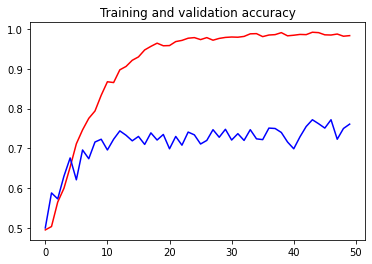

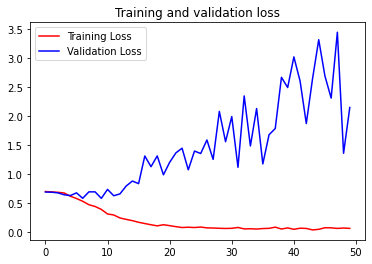

In [22]:
#Training and Testing Results with AlexNet Architecture and RMSProp Optimizer

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()